In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'Gulim'

# 1. 데이터 불러오기
---
- null값을 가진 컬럼이 있음 : 환자번호, 국적, 환자정보, 여행력, 조치사항, 이동경로
- 분석에 불필요한 컬럼이 있음 : 등록일, 수정일, 노출여부
- 확진일 별, 지역 별로 데이터를 확인할 수 있음

In [3]:
df = pd.read_csv('data/서울시 코로나19 확진자 현황.csv')
df.head()

C:\Users\seonghunyun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


# 2. 데이터 확인 & 전처리
---

## 2.1 특정 컬럼 별 데이터 확인
- 환자번호, 국적, 환자정보, 조치사항, 이동경로 컬럼의 대부분이 null 값으로 삭제 필요
- 여행력 컬럼은 다양한 데이터가 존재하여 삭제하지 않을 예정

In [4]:
# null값을 가진 컬럼이 있음 → 어떤 데이터를 보유하고 있는지 확인 필요
# 컬럼명 : 환자번호, 국적, 환자정보, 조치사항, 이동경로, 여행력

print('"환자번호" 데이터 :', df['환자번호'].unique())
print('"국적" 데이터 :', df['국적'].unique())
print('"환자정보" 데이터 :', df['환자정보'].unique())
print('"조치사항" 데이터 :', df['조치사항'].unique())
print('"이동경로" 데이터 :', df['이동경로'].unique())
print('"여행력" 데이터 :', df['여행력'].unique())

"환자번호" 데이터 : [nan]
"국적" 데이터 : [nan]
"환자정보" 데이터 : [nan]
"조치사항" 데이터 : [nan]
"이동경로" 데이터 : [nan '이동경로 공개기간 경과']
"여행력" 데이터 : [nan '나이지리아' '영국' '싱가폴' '프랑스' '러시아' '헝가리' '아랍에메리트' '중국' '우즈베키스탄' '베트남'
 '필리핀' '미국' '카자흐스탄' '피지' '일본' ' ' '세르비아' '몽골' '영국미국' '미얀마' '모로코' '사우디'
 '캄보디아' '폴란드' '몽고' '독일' '인도네시아' '스위스' '이란' '리비아' '태국' ' 우즈베키스탄' '인도'
 ' 키르기즈스탄' '캐나다' '모잠비크' '파키스탄' '이라크' '방글라데시' '터키' '스페인' '아랍에미리트' '일본터키'
 '멕시코' '튀니지' '체코' '우크라이나' '네덜란드' '아르메니아' '몰타' '스웨덴' '아이보리코스트' '과테말라' '브라질'
 '에스토니아' '아르헨티나' '슬로바키아' '세네갈' '불가리아' '조지아' '키르기스스탄' '스리랑카' '파라과이' '가나'
 '모스크바' '네팔' '아프리카 말라위' '말레이시아' '자카르타' '케냐' '쿠웨이트' 'UAE' '타지키스탄' '도미니카공화국'
 '아프카니스탄' '시에라리온' '  ' '핀란드' '콜롬비아' '덴마크' '인도 ' '오만' '아프가니스탄' '아일랜드'
 '이스라엘' '남아프리카공화국' '잠비아' '미국 ' '이집트' '짐바브웨' '방글라데시아랍에미리트' '사우디아라비아'
 '마케도니아' '중국(시안)' '파푸아뉴기니(포트모르즈비)' '파푸아뉴기니' '페루' '21.4.7' '강릉' '아랍에미레이트'
 '수단' '중국(장춘)' '아랍에미리트연합' '필리핀 ' '카타르' '인도 델리' '멕시코(미국경유)' '오스트리아' '베네수엘라'
 '베트남 사이공' '체코 ' '바레인' '아제르바이잔' '불가리아터키' '미국LA' '레바논' '러브코랄무드' '에티오피나'
 '탄자니아' '요르단' '이탈리아

## 2.2 불필요한 컬럼 삭제
- null값이 대부분인 컬럼 삭제
- 분석에 불필요한 컬럼 삭제

In [5]:
df.drop(columns = ['환자번호', '국적', '환자정보', '조치사항', '이동경로', '등록일', '수정일', '노출여부'], inplace = True)

In [6]:
df.head()

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-


## 2.3 자료형 변환
- 확진일 : object → datetime
- 지역 : object → category

### 2.3.1 '확진일' 컬럼

In [7]:
df.dtypes

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object

In [8]:
# '확진일' 자료형 변환
df['확진일'] = pd.to_datetime(df['확진일'])
df.dtypes

연번              int64
확진일    datetime64[ns]
지역             object
여행력            object
접촉력            object
상태             object
dtype: object

### 2.3.2 '지역' 컬럼

In [9]:
# 지역 컬럼 데이터에 중복된 지역이 있음 (공백으로 인한 중복)
print(df['지역'].unique())
print('유니크한 데이터 갯수 : ', df['지역'].nunique())

['기타' '영등포구' '관악구' '서대문구' '송파구' '동대문구' '성동구' '중랑구' '타시도' '종로구' '도봉구' '용산구'
 '마포구' '구로구' '동작구' '강동구' '중구' '노원구' '양천구' '강서구' '은평구' '성북구' '광진구' '금천구'
 '강북구' '강남구' '서초구' '타시도 ' ' 성북구']
유니크한 데이터 갯수 :  29


In [10]:
df['지역'] = df['지역'].str.strip()   # .str.strip() : 문자열에 있는 공백 제거

print(df['지역'].unique())
print('유니크한 데이터 갯수 : ', df['지역'].nunique())

['기타' '영등포구' '관악구' '서대문구' '송파구' '동대문구' '성동구' '중랑구' '타시도' '종로구' '도봉구' '용산구'
 '마포구' '구로구' '동작구' '강동구' '중구' '노원구' '양천구' '강서구' '은평구' '성북구' '광진구' '금천구'
 '강북구' '강남구' '서초구']
유니크한 데이터 갯수 :  27


In [11]:
df['지역'] = df['지역'].astype('category')

In [12]:
df.dtypes

연번              int64
확진일    datetime64[ns]
지역           category
여행력            object
접촉력            object
상태             object
dtype: object

## 2.4 결측치 확인
- 여행력 컬럼에 결측치가 많이 있지만 다양한 데이터가 존재하기 때문에 따로 처리하지 않을 예정

In [13]:
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

# 3. 데이터 분석 - 1 (지역 별 확진자 동향)
---

In [14]:
df

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


## 3.1 확진일 - 지역 별 확진자 수 집계
- 피벗테이블 활용
- 인덱스 : 확진일 / 컬럼 : 지역 데이터 / 데이터 : 연번

In [15]:
df_gu = df.pivot_table(index = '확진일', columns = '지역', values = '연번', aggfunc = 'count', margins = True)
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


### 3.1.1 서울시의 일별 확진자 동향
- 피벗테이블 만들 때, 'margins = True'로 총계 컬럼을 추가했는데, 이 총계 컬럼(All)을 활용하면 된다.

In [16]:
s_date = df_gu['All'][:-1]  # 슬라이싱 하는 이유 : 마지막 행의 총계를 제거하기 위함
s_date

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64

In [17]:
# 총계가 많았던 순으로 데이터 보기 → sort_values 활용
s_date.sort_values(ascending = False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

- 그래프를 확인하면, 시간이 지날수록 일별 확진자가 증가하는 것을 볼 수 있다.

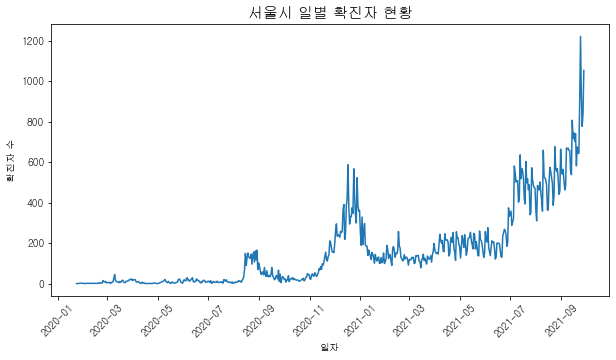

In [18]:
# 시각화

x = s_date.index
y = s_date.values

plt.figure(figsize = (10, 5))
plt.plot(x, y)

plt.title('서울시 일별 확진자 현황', size = 15)
plt.xlabel('일자')
plt.ylabel('확진자 수')

plt.xticks(rotation = 45)

plt.show()

### 3.1.2 서울시 지역별 누적 확진자 비교

In [19]:
s_gu = df_gu.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending = False)
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

- 강남구 > 송파구 > 관악구 > ... 으로 누적 확진자가 많은 것을 확인할 수 있다.

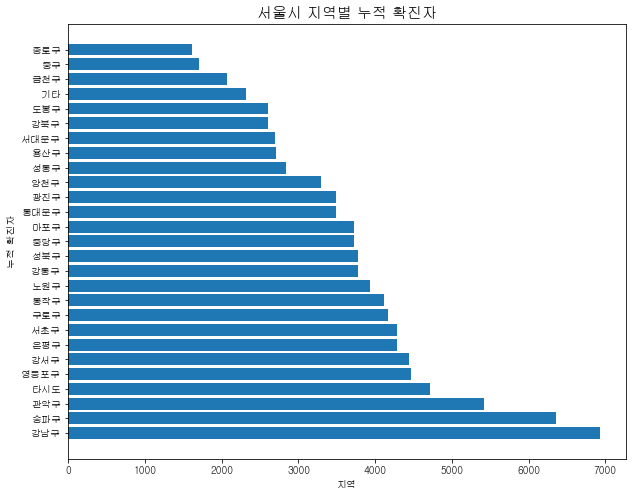

In [20]:
# 시각화

x = s_gu.index
y = s_gu.values

plt.figure(figsize = (10, 8))
plt.barh(x, y)

plt.title('서울시 지역별 누적 확진자', size = 15)
plt.xlabel('지역')
plt.ylabel('누적 확진자')

plt.show()

### 3.1.3 21.09.28 지역 별 확진자

In [21]:
# 위에서 만든 피벗테이블 들고오기
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [22]:
# 21.09.28 데이터는 밑에서 두번째 줄에 있으니 슬라이싱하여 들고오기
s_gu = df_gu.iloc[-2][:-1]
s_gu = s_gu.sort_values(ascending = False)
s_gu

지역
송파구     68
동대문구    66
기타      65
구로구     55
강동구     51
관악구     48
마포구     47
은평구     47
강남구     45
타시도     43
영등포구    43
성북구     41
강서구     41
중구      37
광진구     36
도봉구     35
금천구     31
서대문구    30
노원구     29
동작구     28
양천구     27
중랑구     26
강북구     25
성동구     24
용산구     24
종로구     23
서초구     19
Name: 2021-09-28 00:00:00, dtype: int64

- 송파구 > 동대문구 > 기타 > ... 으로 21.09.28의 확진자가 많은 것을 확인할 수 있다.
- 누적확진자와 또 다른 양상을 보이는 것을 알 수 있다.

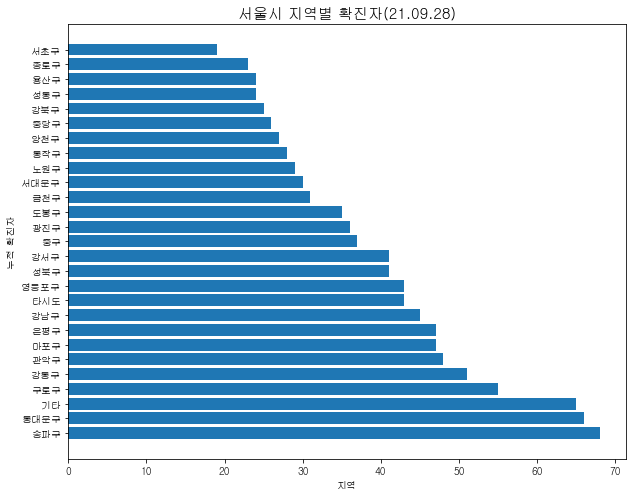

In [23]:
# 시각화

x = s_gu.index
y = s_gu.values

plt.figure(figsize = (10, 8))
plt.barh(x, y)

plt.title('서울시 지역별 확진자(21.09.28)', size = 15)
plt.xlabel('지역')
plt.ylabel('누적 확진자')

plt.show()

# 4. 데이터 분석 - 2 (접촉력에 따른 확진)
---

In [24]:
df.head()

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-


## 4.1 접촉력에 따른 확진 건수 best 10
- value_counts()를 하면 높은 순으로 정렬이 되기 때문에 0 ~ 9 인덱스의 데이터를 슬라이싱하면 상위 10개의 데이터를 구할 수 있다.

In [25]:
df['접촉력'].value_counts()[:10].to_frame()

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


## 4.2 21년 9월 접촉력에 따른 확진 건수 best 10
- 21년 9월이라는 조건이 붙었기 때문에 이 조건을 추가해야 함
- 조건과 조건을 더할 때 & 사용!

In [26]:
df[(df['확진일'].dt.year == 2021) & (df['확진일'].dt.month == 9)]['접촉력'].value_counts()[:10].to_frame()

,접촉력
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
강서구 소재 시장 관련,44
동대문구 소재 시장 관련,44
